## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Plotly
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go

import sweetviz

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# import researchpy as rp

import datetime
from datetime import datetime, timedelta

# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy.stats
from collections import Counter

import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("PASTAPURCHASE_EDITED.csv")

In [3]:
df.head()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
0,1,1,0.94,1,61.71,25186.80,3
1,1,2,2.56,2,61.71,25186.80,3
2,1,3,0.90,0,61.71,25186.80,3
3,1,4,1.92,1,61.71,25186.80,3
4,1,5,1.55,0,61.71,25186.80,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HHID    40000 non-null  int64  
 1   TIME    40000 non-null  int64  
 2   PASTA   40000 non-null  float64
 3   EXPOS   40000 non-null  int64  
 4   AGE     40000 non-null  float64
 5   INCOME  40000 non-null  float64
 6   AREA    40000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.1 MB


In [5]:
df.describe()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
count,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00
mean,1000.50,10.50,1.84,0.50,42.25,27096.13,3.00
std,577.36,5.77,1.03,0.70,13.77,15928.19,1.41
min,1.00,1.00,0.00,0.00,18.01,609.11,1.00
25%,500.75,5.75,1.11,0.00,30.51,15379.59,2.00
50%,1000.50,10.50,1.81,0.00,42.44,24487.07,3.00
75%,1500.25,15.25,2.53,1.00,54.36,35272.53,4.00
max,2000.00,20.00,6.59,5.00,64.98,141066.97,5.00


In [6]:
df.groupby("TIME").mean()

,HHID,PASTA,EXPOS,AGE,INCOME,AREA
TIME,,,,,,
1,1000.50,1.85,0.50,42.25,27096.13,3.00
2,1000.50,1.80,0.47,42.25,27096.13,3.00
3,1000.50,1.85,0.51,42.25,27096.13,3.00
4,1000.50,1.81,0.50,42.25,27096.13,3.00
5,1000.50,1.88,0.50,42.25,27096.13,3.00
6,1000.50,1.83,0.51,42.25,27096.13,3.00
7,1000.50,1.85,0.50,42.25,27096.13,3.00
8,1000.50,1.84,0.49,42.25,27096.13,3.00
9,1000.50,1.82,0.47,42.25,27096.13,3.00


In [7]:
df.groupby("TIME").std()

,HHID,PASTA,EXPOS,AGE,INCOME,AREA
TIME,,,,,,
1,577.49,0.99,0.70,13.77,15931.97,1.41
2,577.49,1.01,0.69,13.77,15931.97,1.41
3,577.49,1.02,0.71,13.77,15931.97,1.41
4,577.49,1.04,0.72,13.77,15931.97,1.41
5,577.49,1.03,0.70,13.77,15931.97,1.41
6,577.49,1.03,0.70,13.77,15931.97,1.41
7,577.49,1.05,0.71,13.77,15931.97,1.41
8,577.49,1.00,0.71,13.77,15931.97,1.41
9,577.49,1.03,0.69,13.77,15931.97,1.41


In [8]:
df.INCOME.min()

609.107169536252

In [9]:
df[df.INCOME == 609.107169536252].head(1)

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
35240,1763,1,2.33,0,32.22,609.11,2


In [10]:
df.INCOME.max()

141066.96688333

In [11]:
df[df.INCOME == 141066.96688333].head(1)

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
19220,962,1,3.71,0,28.55,141066.97,5


In [12]:
df.PASTA.max()

6.59276912971716

In [13]:
df.groupby("AREA").mean()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME
AREA,,,,,,
1,957.70,10.50,1.83,0.50,42.91,28076.60
2,983.40,10.50,1.83,0.49,42.58,26218.86
3,1002.01,10.50,1.86,0.51,41.61,25879.49
4,1068.10,10.50,1.84,0.50,42.22,29260.13
5,990.54,10.50,1.85,0.50,41.94,26030.91


In [14]:
df2 = df[df.AREA == 2]

In [15]:
(df2.INCOME > 20000).sum()

4880

In [16]:
df.corr()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
HHID,1.00,0.00,0.00,0.00,-0.00,-0.01,0.04
TIME,0.00,1.00,0.00,0.01,-0.00,-0.00,-0.00
PASTA,0.00,0.00,1.00,0.33,-0.14,-0.00,0.01
EXPOS,0.00,0.01,0.33,1.00,-0.01,0.01,0.00
AGE,-0.00,-0.00,-0.14,-0.01,1.00,-0.00,-0.02
INCOME,-0.01,-0.00,-0.00,0.01,-0.00,1.00,-0.01
AREA,0.04,-0.00,0.01,0.00,-0.02,-0.01,1.00


In [17]:
df3 = df.groupby("HHID").sum()
df3

,TIME,PASTA,EXPOS,AGE,INCOME,AREA
HHID,,,,,,
1,210,42.52,9,1234.22,503735.98,60
2,210,46.36,15,843.77,478935.71,60
3,210,37.51,10,918.32,260893.28,80
4,210,39.12,11,919.73,635186.14,20
5,210,41.32,12,1189.25,791713.12,100
...,...,...,...,...,...,...
1996,210,42.60,8,448.10,602556.65,80
1997,210,39.88,10,1023.26,1104345.61,80
1998,210,40.59,13,1089.02,553145.29,20


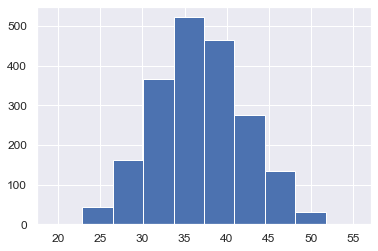

In [18]:
df3.PASTA.hist()
plt.show()

In [19]:
df.TIME

0         1
1         2
2         3
3         4
4         5
         ..
39995    16
39996    17
39997    18
39998    19
39999    20
Name: TIME, Length: 40000, dtype: int64

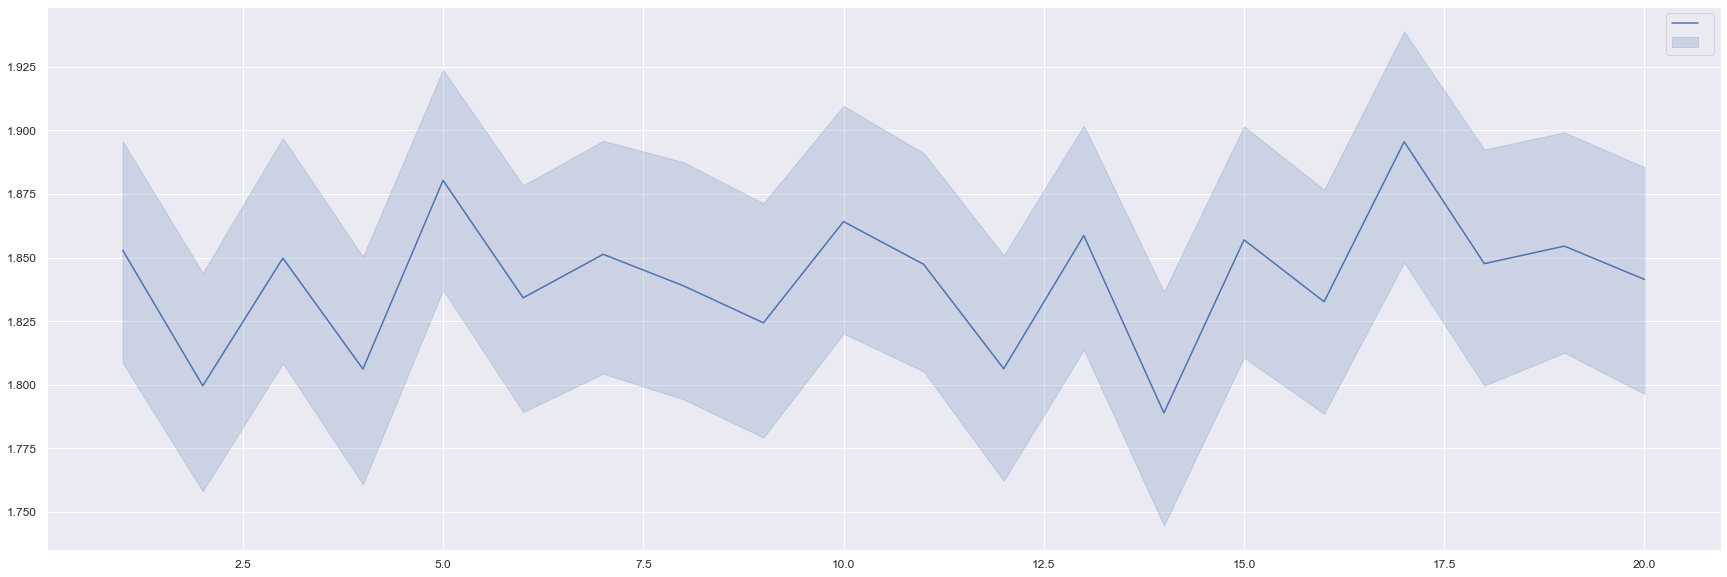

In [20]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.TIME,y=df.PASTA ,data=df, estimator='mean')
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [21]:
-----------

SyntaxError: invalid syntax (353815310.py, line 1)

### Concat dataset in Pandas

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
train.head()

In [ ]:
train.tail()

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test.head()

In [ ]:
test.tail()

In [ ]:
df = pd.concat([train,test], axis=0, ignore_index=True)

In [ ]:
df

In [ ]:
df.to_csv("combined.csv", index=False)

### Joins in Pandas

In [ ]:
pd.merge(df1,df2,on='Product_ID')

In [ ]:
pd.merge(df1,df2,left_on='Product_name',right_on='Purchased_Product')

In [ ]:
pd.merge(df1,df2,how='inner',left_on=['Product_ID','Seller_City'],right_on=['Product_ID','City'])

In [ ]:
pd.merge(df1,df2,on='Product_ID',how='outer',indicator=True)

In [ ]:
pd.merge(df1,df2, on='Product_ID',how='left')

In [ ]:
pd.merge(df1,df2, on='Product_ID',how='right')

In [ ]:
#Handling Redundancy/Duplicates in Joins
pd.merge(df1.drop_duplicates(),df2,how='inner',on='Product_ID')

### Pandas-Profiling Reports

In [ ]:
profile = ProfileReport(df=df, title='Name of Report', minimal=True)

In [ ]:
profile.to_notebook_iframe()

In [ ]:
profile.to_file("your_report.html")

### SweetViz Reports

In [ ]:
report = sweetviz.analyze(df)
report.show_html("analysis.html")

In [ ]:
report.show_notebook()

In [ ]:
df.columns

In [ ]:
df.head(1)

In [ ]:
# Define features and set types
feature_config = sweetviz.FeatureConfig(skip=('Loan_ID'), force_cat=('Credit_History'), force_text=(), force_num=())

In [ ]:
report2 = sweetviz.compare(source=train, compare=test, feat_cfg=feature_config)

In [ ]:
report2.show_html()

## Data Visualization

### Univariate Data Exploration

In [ ]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
# Sort Barplots by Values and Single Plot

fig = plt.figure(figsize=(20,10))


sns.barplot(x=meanprice.index, y=meanprice["Avg Ticket Price"], data=meanprice,
            order=meanprice.sort_values('Avg Ticket Price', ascending=False).index)
plt.title("Average Ticket Prices by Routes", size=20)
plt.xlabel("Route")
plt.ylabel("Average Ticket Prices")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
fig.suptitle('Main Title')


sns.barplot(x="", y="", data=df, ax=ax[0])
ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.barplot(x="", y="", data=df, ax=ax[1])
ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.barplot(x="", y="", data=df, ax=ax[2])
ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("")
ax[2].set_ylabel("")

sns.barplot(x="", y="", data=df, ax=ax[3])
ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("")
ax[3].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Main Title')

sns.countplot(x="", data=df, hue=, ax=ax[0])
ax[0].set_title('Title of the first chart')
ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.countplot(x="", data=df, hue=, ax=ax[1])
ax[1].set_title('Title of the second chart')
ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")


plt.tight_layout()
plt.show()

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,20))
fig.suptitle('Main Title', y=0.5)

sns.countplot(x="", data=df, ax=ax1)
ax1.set_title('Title of the first chart', size=20)
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("")
ax1.set_ylabel("")

sns.countplot(x="", data=df, ax=ax2)
ax2.set_title('Title of the second chart', size=20)
#ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("")
ax2.set_ylabel("")

sns.countplot(x="", data=df, ax=ax3)
ax3.set_title('Title of the third chart', size=20)
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("")
ax3.set_ylabel("")

sns.countplot(x="", data=df, ax=ax4)
ax4.set_title('Title of the fourth chart', size=20)
#ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,40))

plt.subplot(4,2,1)
plt.title("", size=20)
sns.countplot()
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,2,2)
plt.title("", size=20)
sns.barplot()
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,2,3)
plt.title("", size=20)
sns.scatterplot()
plt.xlabel("")
plt.ylabel("")

plt.subplot(4,2,4)
plt.title("", size=20)
sns.boxplot()
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

### CatPlots

In [ ]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='', hue = '', row = '',
            kind='count', data=ratings_df,
            height = 3, aspect = 1)

g.set_xlabels("")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.catplot(x="calories", y="restaurant",

                hue="is_salad", ci=None,

                data=df_calories, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df, height = 3, aspect = 2)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

## Time-Series Analysis

In [ ]:
timeseries = df[['date','extraction','month', 'day']]

In [ ]:
timeseries

In [ ]:
timeseries.info()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

## Pairplots

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df.sample(500))
plt.show()

## Plotly Express Graphs

In [ ]:
fig = px.bar(data_frame=df, x="", y="", 
             width=600, height=400, title="",
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'})
fig.show()

In [ ]:
fig = px.pie(data_frame=df3, names="", values="", 
             width=600, height=400, title="",
             )
fig.show()

In [ ]:
fig = px.scatter(data_frame=df, x="", y="", color="continent", title="",
                 size="pop", size_max=10, hover_name="country")
fig.show()

In [ ]:
fig = px.scatter(data_frame=df, x="", y="", color="continent", size="pop", size_max=60, title="",
          hover_name="country", facet_col="continent", log_x=True)
fig.show()

In [ ]:
fig = px.scatter(data_frame=df, x="", y="", animation_frame="year", animation_group="country",title="",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90],
           labels=dict(pop="Population", gdpPercap="GDP per Capita", lifeExp="Life Expectancy"))
fig.show()

In [ ]:
fig = px.box(data_frame=df, x="time", y="total_bill", facet_col="quartilemethod", color="quartilemethod")

fig.show()

In [ ]:
fig = px.scatter_matrix(data_frame=df, title="Heatmap", width=2000, height=2000,
                       labels={col:col.replace('_', ' ') for col in df.columns})
fig.show()

In [ ]:
fig = px.choropleth(data_frame=df, locations="iso_alpha", color="lifeExp", hover_name="country", 
                    animation_frame="year", title="",
                    color_continuous_scale=px.colors.sequential.Plasma, projection="natural earth")
fig.show()

In [ ]:
fig = px.line(data_frame=df, x="", y="", color="continent", line_group="country", hover_name="country",
              title="", line_shape="spline", render_mode="svg", 
              labels={'actual_productivity': 'Actual Productivity'})
fig.show() 

In [ ]:
fig = px.area(data_frame=df, x="", y="", color="continent", line_group="country", title="",
              labels={'actual_productivity': 'Actual Productivity'})
fig.show()

In [ ]:
fig = px.imshow(df,labels=dict(x= "Year",color= "GDP%")) #Code A
fig.layout.title = "GDP Annual Growth Rate" # Code B
fig.show()

## Bivariate Data Exploration

In [ ]:
sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

plt.tight_layout()
plt.show()

## Heatmap

In [ ]:
plt.pcolor(df,edgecolors='yellow', vmin=-2, vmax=1)

plt.yticks(np.arange(0.5, len(df.index), 1), df.index) 
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.title("GDP Annual Growth Rate")
plt.show()

## Regression plot

In [ ]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#Feature

ax1 = sns.regplot(x=X_test.bmi, y=lr_pred, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Plot 1", size=15)

#Feature

ax2 = sns.regplot(x=X_test.s5, y=lr_pred, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Plot 2", size=15)

#Feature

ax3 = sns.regplot(x=X_test.bp, y=lr_pred, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Plot 3", size=15)

#Feature

ax4 = sns.regplot(x=X_test.s4, y=lr_pred, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("Plot 4", size=15)
plt.suptitle('Regression Plots', x=0.5, y=0.9, ha='center', fontsize=20)
plt.show()

### FacetGrid

In [ ]:
g = sns.FacetGrid(data=df, col="column_name", height=3, aspect=1)
g.map(plt.scatter, "numeric", "numeric")
g.add_legend()
plt.show()

## Geospatial Analysis

In [ ]:
mapping = usa_stores[['City','Latitude','Longtitude','Sentiment','Revenue']]
mapping

In [ ]:
m = folium.Map(location=[37.090240,-95.712891], zoom_start=5)
m

In [ ]:
map_df = pd.DataFrame(mapping.groupby(["City","Latitude","Longtitude"]).mean())
map_df

In [ ]:
folium.Marker(location=[33.76,-84.42], popup="Atlanta", tooltip="Sentiment=83.69, Revenue=292.57").add_to(m)
folium.Marker(location=[36.23,-115.27], popup="Las Vegas", tooltip="Sentiment=83.72, Revenue=187.40").add_to(m)
folium.Marker(location=[34.11,-118.41], popup="Los Angeles", tooltip="Sentiment=83.75, Revenue=255.95").add_to(m)
folium.Marker(location=[40.69,-73.92], popup="New York", tooltip="Sentiment=83.71, Revenue=328.38").add_to(m)
folium.Marker(location=[32.83,-117.12], popup="San Diego", tooltip="Sentiment=83.70, Revenue=272.93").add_to(m)

m

In [ ]:
m.save("filename.html")

In [ ]:
state_geo = f"malaysia.geojson"

In [ ]:
map2 = folium.Map(location=[4.210484,108.975766], zoom_start=6)

And now to create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1.  `geo_data`, which is the GeoJSON file.
2.  `data`, which is the dataframe containing the data.
3.  `columns`, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4.  `key_on`, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.

In [ ]:
folium.Choropleth(geo_data=state_geo, name="choropleth").add_to(map2)

### Correlation

In [ ]:
df.corr()

In [ ]:
df.corr()["target"].sort_values()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


### Levene's Test

In [ ]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

## T-Test

### One Sample T-Test

In [ ]:
t, p = scipy.stats.ttest_1samp(a=df.dose, popmean=1.166667)

In [ ]:
print("T-test value is: ", t)
print("p-value value is: ", p)

### Two Samples T-Test

In [ ]:
t, p = scipy.stats.ttest_ind(a=df.len,b=df.dose, equal_var = True/False)

In [ ]:
print("T-test value is: ",t)
print("p-value value is: ",p)

### ResearchPy

In [ ]:
rp.ttest(group1= df2['Median'][df['Major_category'] == 'Computers & Mathematics'], group1_name= "CM",
         group2= df2['Median'][df['Major_category'] == 'Education'], group2_name= "EDU",
         equal_variances=True, paired=False)

### ANOVA

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older


State the hypothesis

-   $H_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


### One Way ANOVA

In [ ]:
mod = ols('len~supp', data=df).fit()

In [ ]:
aov_table = sm.stats.anova_lm(mod,typ=2)

In [ ]:
aov_table

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

### Two-way ANOVA

In [ ]:
mod1 = ols('len~supp+dose', data=df).fit()

In [ ]:
aov1 = sm.stats.anova_lm(mod1,typ=2)

In [ ]:
aov1

### Chi-square

State the hypothesis:

-   $H_0:$ The proportion of teachers who are tenured is independent of gender
-   $H_1:$ The proportion of teachers who are tenured is associated with gender

In [ ]:
#Create a Cross-tab table

cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

In [ ]:
scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
chi_square = scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
print(f"Chi score is", chi_square[0])

In [ ]:
print("P-value is", chi_square[1])

In [ ]:
print("Degrees of freedom is", chi_square[2])

### Correlation

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


In [ ]:
pearson_correlation = scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

In [ ]:
print("Pearson's correlation coefficient is", pearson_correlation[0])

In [ ]:
print("P-value is", pearson_correlation[1])

## Data Preprocessing

### Feature Engineering

### Equal Width Discretization

In [ ]:
df["demoscorecat"] = df["polityscore"] #Make a copy

In [ ]:
disc = EqualWidthDiscretiser(bins=4, variables=['demoscorecat'], return_object=True)

In [ ]:
disc

In [ ]:
disc.fit(df)

In [ ]:
disc.binner_dict_

In [ ]:
df2 = disc.fit_transform(df)
df2.head()

In [ ]:
df2["demoscorecat"].value_counts().plot.bar()
plt.show()

### Equal Frequency Discretizer

In [ ]:
df2["co2cat"] = df2["co2emissions"] #Make a copy

In [ ]:
disc = EqualFrequencyDiscretiser(q=5, variables=['co2cat'])

In [ ]:
disc.fit(df2)

In [ ]:
disc.binner_dict_

In [ ]:
df3 = disc.transform(df2)
df3.head()

In [ ]:
df3["co2cat"].value_counts().plot.bar()
plt.show()

### Discretisation + OrdinalEncoder

In [ ]:
### Choose which columns to be discretized first
df3["incomecat"] = df3["incomeperperson"] #Make a copy
df3["alccat"] = df3["alcconsumption"] #Make a copy

In [ ]:
df3.head()

In [ ]:
# to encode variables we need them returned as objects for feature-engine
disc = EqualFrequencyDiscretiser(q=5, variables=['incomecat','alccat'], return_object=True)

In [ ]:
df4 = disc.fit_transform(df3)
df4.head()

In [ ]:
df4["incomecat"].value_counts().plot.bar()
df4["alccat"].value_counts().plot.bar()
plt.show()

In [ ]:
# Set y = target variable, and x = independant variables (both must be objects)

In [ ]:
df5 = df4[['demoscorecat','incomecat', 'alccat']]
df5.head()

In [ ]:
df5.dtypes

In [ ]:
df5.groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

In [ ]:
df5.groupby('alccat')['demoscorecat'].mean().plot()
plt.show()

In [ ]:
enc = OrdinalEncoder(encoding_method = 'ordered')

In [ ]:
X = df5[['incomecat', 'alccat']]

In [ ]:
y = df5['demoscorecat']

In [ ]:
enc.fit(X, y)

In [ ]:
X_transform = enc.transform(X)

In [ ]:
enc.encoder_dict_

In [ ]:
X_transform  # Transformed for monotonic relationship

In [ ]:
pd.concat([X_transform, y], axis=1)

In [ ]:
pd.concat([X_transform, y], axis=1).groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

### Discretisation with Decision Trees

In [ ]:
df4['electricat'] = df4['relectricperperson'] #Make a copy

In [ ]:
df4.head()

In [ ]:
# Let y = demoscorecat, and x = electricat, breastcancerper100th

df6 = df4[['breastcancerper100th','electricat','demoscorecat']]
df6.head()

In [ ]:
X = df6[['breastcancerper100th','electricat']]
y = df6['demoscorecat']

In [ ]:
# set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=5, scoring='accuracy', variables=['electricat'], regression=False,
                                  param_grid={'max_depth':[1,2,3], 'min_samples_leaf':[2,4,6]})

In [ ]:
treeDisc.fit(X,y)

In [ ]:
treeDisc.binner_dict_['electricat'].best_params_

In [ ]:
treeDisc.scores_dict_['electricat']

In [ ]:
X_transform = treeDisc.transform(X) #Only electricat column

In [ ]:
X_transform

In [ ]:
X_transform.electricat.unique()

In [ ]:
# monotonic relationship with target: train set

pd.concat([X_transform, y],axis=1)

### Drop unwanted features

In [ ]:
df.columns

In [ ]:
df.drop()

### Treat Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
df[''] = df[''].replace(np.nan,df.mean())

In [ ]:
#imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [ ]:
#imputer.fit(df)

In [ ]:
#df = imputer.transform(df)

In [ ]:
df.isnull().sum()

### Replacing values

In [ ]:
df.replace()

### Rounding Values

In [ ]:
###pandas.DataFrame.round
df[['internetuserate']] = df[['internetuserate']].round(decimals=0)

### Treat Duplicate Values

In [ ]:
df.duplicated(keep='first').sum()

In [ ]:
df[df.duplicated(keep=False)] #Check duplicate values

In [ ]:
df.drop_duplicates(ignore_index=True, inplace=True)

### Treat Outliers

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
#windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5, variables=[])

In [ ]:
#windsorizer.fit(df)

In [ ]:
#df2 = windsorizer.transform(df)

In [ ]:
#df2

In [ ]:
#df2.describe()

In [ ]:
#windsorizer.left_tail_caps_

In [ ]:
#windsorizer.right_tail_caps_

### Type Change

In [ ]:
df.info()

In [ ]:
df["breastcancerper100th"] = df["breastcancerper100th"].astype('int')

In [ ]:
df.info()

### One-hot encoding

In [ ]:
df.info()

In [ ]:
df["has_gas"] = pd.get_dummies(data=df["has_gas"],drop_first=True)

### Save to CSV

In [ ]:
df.to_csv("filename.csv", index=False)

## Regression Analysis

### Linear Regression (StatsModel)

In [ ]:
df.columns

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

In [ ]:
prediction = model.predict(x)

In [ ]:
linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()

### Residual Plots

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x_variables', fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(prestige_model, "education")
fig.tight_layout(pad=1.0)

### Linear Regression (SKLearn)

## Logistic Regression (StatsModel)

In [ ]:
df.columns

In [ ]:
y = df['']
X = df['']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.Logit(y, X).fit()

In [ ]:
model.summary()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ Debt_Service_Coverage + cash_security_to_curLiab + TNW', data = hgc).fit()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ TNW + C(seg2)', data = hgcdev).fit()

### Logistic Regression (SKLearn)

In [ ]:
df.shape

In [ ]:
X = df.iloc[:,:4]
y = df.iloc[:,4]

In [ ]:
Counter(y)

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
Counter(y_train), Counter(y_test)

In [ ]:
lr = LogisticRegression(random_state=0)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
plot_confusion_matrix(estimator=lr, X=X_test, y_true=y_test, cmap='YlGnBu')
plt.show()

In [ ]:
plot_roc_curve(estimator=lr, X=X_test, y=y_test)
plt.show()

#### Python code done by Dennis Lam